# Redshift SQL Notebook 

***

#### Steps to connect to Redshift
<ol>
    <li> Setup JupySQL SQL package </li>
    <li> Read connection infromation from secret </li>
    <li> Query using %sql or %%sql </li>
    <li> Visualize your data using pandas </li>
</ol>

<div class="alert alert-block alert-info">
<b>NOTE :</b> 
<ol>
    <li> The notebook connects to the project's Redshift serverless cluster using the admin account secret. You should modify to connect using credentials created for you in sercet manager
<li> Connect to EMR cluster or serverless
    <li> Set kernel as Python 3</ol></div>


---
## 2. Install packages from PyPI
We will install jupysql Python package. 
<div class="alert alert-block alert-info">
<b>NOTE :</b> You will need internet access to do this step. This requires your EMR cluster or serverless to be able to connect to pypi on internet. The security group for EMR would need to allow that and VPC should have NAT and IG. In case you do not have that, you may want to use custom EMR serverless image or custom EMR image with jupysql pre-installed. </div>

In [2]:
%pip install jupysql sqlalchemy-redshift redshift-connector 'sqlalchemy<2' --quiet

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


---
## 3. Setup Connection
We will use a public data set on NYC yellow taxis. Read the Parquet file from S3. The file has headers and we want Spark to infer the schema. 
<div class="alert alert-block alert-info">
<b>NOTE :</b> You will need to update your runtime role to allow Get access to the s3://athena-examples-us-east-1/notebooks/ folder and its sub-folders.</div>

In [3]:
%load_ext sql

Deploy Dash apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


In [4]:
from os import environ
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import boto3
import json 

sm_client = boto3.client('secretsmanager',region_name="us-east-1")
secret = sm_client.get_secret_value(SecretId="redshift!core-namespace-admin")
secret_dict = json.loads(secret['SecretString'])


/home/hadoop/.local/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [5]:

url = URL.create(
    drivername="redshift+redshift_connector",
    username=secret_dict['username'],
    password=secret_dict["password"],
    host="core-workgroup.585742243097.us-east-1.redshift-serverless.amazonaws.com",
    port="5440",
    database="coredb",
)

engine = create_engine(url)

In [6]:
%sql engine  --alias redshift-sqlalchemy

---
## 3. SQL notebook
We will install matplotlib Python package. 
<div class="alert alert-block alert-info">
<b>NOTE :</b> You will need internet access to do this step.</div>

In [7]:
%%sql 
select * from PG_TABLE_DEF

Running query in 'redshift-sqlalchemy'

schemaname,tablename,column,type,encoding,distkey,sortkey,notnull
pg_catalog,padb_config_harvest,name,character(136),lzo,False,0,True
pg_catalog,padb_config_harvest,harvest,integer,az64,False,0,True
pg_catalog,padb_config_harvest,archive,integer,az64,False,0,True
pg_catalog,padb_config_harvest,directory,character(500),lzo,False,0,True
pg_catalog,pg_aggregate,aggfnoid,regproc,none,False,0,True
pg_catalog,pg_aggregate,aggtransfn,regproc,none,False,0,True
pg_catalog,pg_aggregate,aggfinalfn,regproc,none,False,0,True
pg_catalog,pg_aggregate,aggtranstype,oid,none,False,0,True
pg_catalog,pg_aggregate,agginitval,text,none,False,0,False
pg_catalog,pg_am,amname,name,none,False,0,True


In [26]:
%%sql 

CREATE TABLE mkt_sls_table AS
SELECT 146776932 AS ord_num, 23 AS sales_qty_sld, 23.4 AS wholesale_cost, 45.0 as lst_pr, 43.0 as sell_pr, 2.0 as disnt, 12 as ship_mode,13 as warehouse_id, 23 as item_id, 34 as ctlg_page, 232 as ship_cust_id, 4556 as bill_cust_id
UNION ALL SELECT 46776931, 24, 24.4, 46, 44, 1, 14, 15, 24, 35, 222, 4551
UNION ALL SELECT 46777394, 42, 43.4, 60, 50, 10, 30, 20, 27, 43, 241, 4565
UNION ALL SELECT 46777831, 33, 40.4, 51, 46, 15, 16, 26, 33, 40, 234, 4563
UNION ALL SELECT 46779160, 29, 26.4, 50, 61, 8, 31, 15, 36, 40, 242, 4562
UNION ALL SELECT 46778595, 43, 28.4, 49, 47, 7, 28, 22, 27, 43, 224, 4555
UNION ALL SELECT 46779482, 34, 33.4, 64, 44, 10, 17, 27, 43, 52, 222, 4556
UNION ALL SELECT 46779650, 39, 37.4, 51, 62, 13, 31, 25, 31, 52, 224, 4551
UNION ALL SELECT 46780524, 33, 40.4, 60, 53, 18, 32, 31, 31, 39, 232, 4563
UNION ALL SELECT 46780634, 39, 35.4, 46, 44, 16, 33, 19, 31, 52, 242, 4557
UNION ALL SELECT 46781887, 24, 30.4, 54, 62, 13, 18, 29, 24, 52, 223, 4561
          

Running query in 'redshift-sqlalchemy'

++
||
++
++

In [27]:
%sqlcmd columns --table mkt_sls_table

name,type,nullable,default,autoincrement,comment,info
ord_num,INTEGER,True,None,False,None,{'encode': 'az64'}
sales_qty_sld,INTEGER,True,None,False,None,{'encode': 'az64'}
wholesale_cost,"NUMERIC(3, 1)",True,None,False,None,{'encode': 'az64'}
lst_pr,"NUMERIC(11, 1)",True,None,False,None,{'encode': 'az64'}
sell_pr,"NUMERIC(11, 1)",True,None,False,None,{'encode': 'az64'}
disnt,"NUMERIC(11, 1)",True,None,False,None,{'encode': 'az64'}
ship_mode,INTEGER,True,None,False,None,{'encode': 'az64'}
warehouse_id,INTEGER,True,None,False,None,{'encode': 'az64'}
item_id,INTEGER,True,None,False,None,{'encode': 'az64'}
ctlg_page,INTEGER,True,None,False,None,{'encode': 'az64'}


In [28]:
%%sql --save sales --no-execute
select * from mkt_sls_table 

Running query in 'redshift-sqlalchemy'

Skipping execution...

<AxesSubplot:title={'center':"'wholesale_cost' from 'sales'"}, xlabel='wholesale_cost', ylabel='Count'>

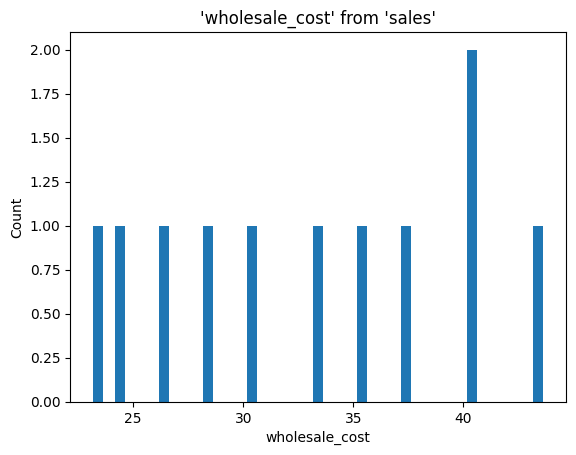

In [29]:
%sqlplot histogram --table sales --column wholesale_cost

## Setup NYC Taxi Data Example in Redshift

This example is from 

[Tutorial from JupySQL](https://jupysql.ploomber.io/en/latest/integrations/redshift.html)

In [8]:
%%sql

CREATE TABLE taxi  (
    VendorID                BIGINT,
    tpep_pickup_datetime    TIMESTAMP,
    tpep_dropoff_datetime   TIMESTAMP,
    passenger_count         DOUBLE PRECISION,
    trip_distance           DOUBLE PRECISION,
    RatecodeID              DOUBLE PRECISION,
    store_and_fwd_flag      VARCHAR(1),
    PULocationID            BIGINT,
    DOLocationID            BIGINT,
    payment_type            BIGINT,
    fare_amount             DOUBLE PRECISION,
    extra                   DOUBLE PRECISION,
    mta_tax                 DOUBLE PRECISION,
    tip_amount              DOUBLE PRECISION,
    tolls_amount            DOUBLE PRECISION,
    improvement_surcharge   DOUBLE PRECISION,
    total_amount            DOUBLE PRECISION,
    congestion_surcharge    DOUBLE PRECISION,
    airport_fee             DOUBLE PRECISION
);

Running query in 'redshift-sqlalchemy'

++
||
++
++

In [15]:
%%sql
COPY taxi
FROM 's3://core-bronze-ACCOUNT_ID-us-east-1/nyc/yellow_tripdata_2023-01 (3).parquet'
IAM_ROLE  'arn:aws:iam::ACCOUNT_ID:role/service-role/AmazonRedshift-CommandsAccessRole-20240316T133053'
FORMAT AS PARQUET;

Running query in 'redshift-sqlalchemy'

++
||
++
++

In [16]:
%%sql 
select * from taxi limit 10

Running query in 'redshift-sqlalchemy'

vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2,2023-01-01 02:10:07,2023-01-01 02:15:27,1.0,1.34,1.0,N,162,107,1,7.9,1.0,0.5,3.87,0.0,1.0,16.77,2.5,0.0
2,2023-01-01 02:25:51,2023-01-01 02:34:46,1.0,2.56,1.0,N,107,140,1,12.8,1.0,0.5,1.78,0.0,1.0,19.58,2.5,0.0
2,2023-01-01 02:35:23,2023-01-01 02:49:39,1.0,8.01,1.0,N,141,244,1,32.4,1.0,0.5,6.0,0.0,1.0,43.4,2.5,0.0
2,2023-01-01 02:16:04,2023-01-01 02:26:44,1.0,1.49,1.0,N,90,79,1,11.4,1.0,0.5,0.0,0.0,1.0,16.4,2.5,0.0
2,2023-01-01 02:44:01,2023-01-01 02:54:11,1.0,3.53,1.0,N,79,262,1,15.6,1.0,0.5,0.0,0.0,1.0,20.6,2.5,0.0
1,2023-01-01 02:31:54,2023-01-01 02:36:57,2.0,1.2,1.0,N,79,137,1,7.2,3.5,0.5,2.4,0.0,1.0,14.6,2.5,0.0
1,2023-01-01 02:38:15,2023-01-01 02:50:21,2.0,4.1,1.0,N,137,75,1,17.7,3.5,0.5,3.0,0.0,1.0,25.7,2.5,0.0
2,2023-01-01 02:07:59,2023-01-01 02:19:19,2.0,2.18,1.0,N,161,249,1,12.8,1.0,0.5,4.45,0.0,1.0,22.25,2.5,0.0
2,2023-01-01 02:21:12,2023-01-01 02:45:14,3.0,4.84,1.0,N,249,75,1,25.4,1.0,0.5,6.08,0.0,1.0,36.48,2.5,0.0
2,2023-01-01 02:01:05,2023-01-01 02:04:20,1.0,0.82,1.0,N,141,229,1,6.5,1.0,0.5,1.0,0.0,1.0,12.5,2.5,0.0


## Download NYC Yellow Taxi Data in Pa
https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page 

In [17]:
%sqlcmd tables

Name
taxi


In [18]:
%sqlcmd columns --table taxi

name,type,nullable,default,autoincrement,comment,info
vendorid,BIGINT,True,None,False,None,{'encode': 'az64'}
tpep_pickup_datetime,TIMESTAMP,True,None,False,None,{'encode': 'az64'}
tpep_dropoff_datetime,TIMESTAMP,True,None,False,None,{'encode': 'az64'}
passenger_count,DOUBLE_PRECISION,True,None,False,None,{}
trip_distance,DOUBLE_PRECISION,True,None,False,None,{}
ratecodeid,DOUBLE_PRECISION,True,None,False,None,{}
store_and_fwd_flag,VARCHAR(1),True,None,False,None,{'encode': 'lzo'}
pulocationid,BIGINT,True,None,False,None,{'encode': 'az64'}
dolocationid,BIGINT,True,None,False,None,{'encode': 'az64'}
payment_type,BIGINT,True,None,False,None,{'encode': 'az64'}


In [19]:
%%sql
SELECT 
    APPROXIMATE PERCENTILE_DISC(0.99) WITHIN GROUP (ORDER BY trip_distance)
FROM 
    taxi;

Running query in 'redshift-sqlalchemy'

percentile_disc
20.03


In [20]:
%%sql --save taxi_no_outliers --no-execute
select * from taxi  where trip_distance < 20

Running query in 'redshift-sqlalchemy'

Skipping execution...

<AxesSubplot:title={'center':"'trip_distance' from 'taxi_no_outliers'"}, xlabel='trip_distance', ylabel='Count'>

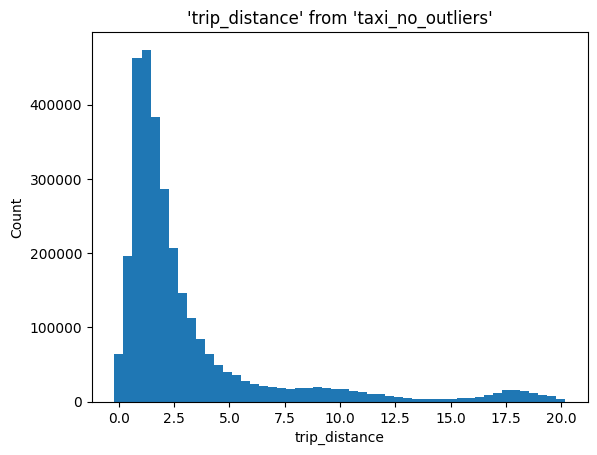

In [21]:
%sqlplot histogram --table taxi_no_outliers --column trip_distance

<AxesSubplot:title={'center':"'trip_distance' from 'taxi_no_outliers'"}, ylabel='trip_distance'>

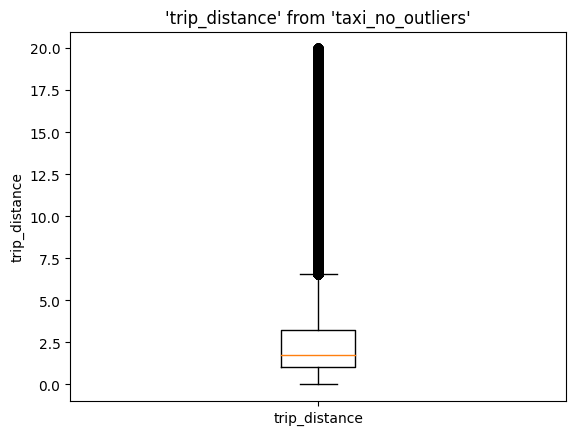

In [22]:
%sqlplot boxplot --table taxi_no_outliers --column trip_distance

Removing NULLs, if there exists any from passenger_count

<AxesSubplot:title={'center':'taxi'}, xlabel='passenger_count', ylabel='Count'>

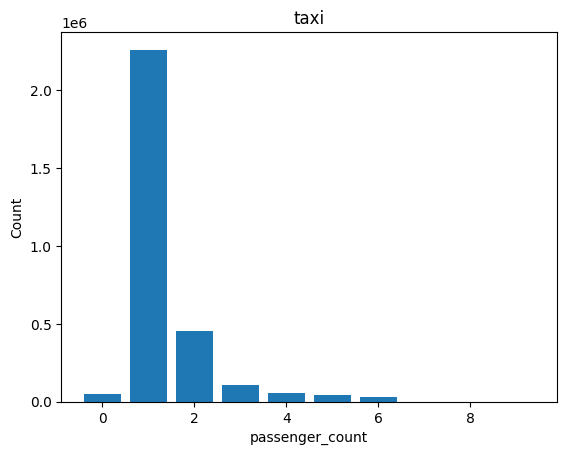

In [23]:
%sqlplot bar --table taxi --column passenger_count

In [24]:
from sql.ggplot import ggplot, aes, geom_histogram

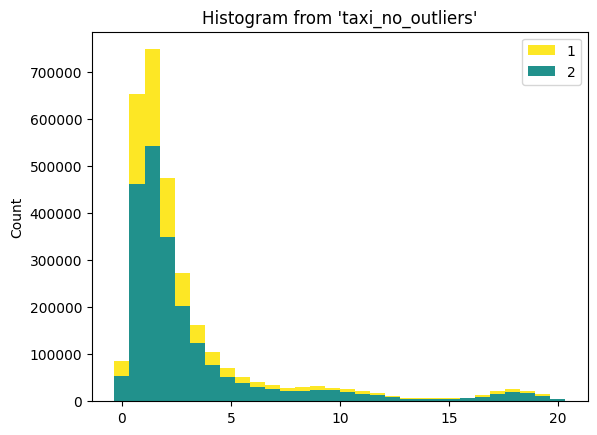

In [25]:
(
    ggplot("taxi_no_outliers", aes(x="trip_distance"), with_="taxi_no_outliers")
    + geom_histogram(bins=30, fill="vendorid")
)